<a href="https://colab.research.google.com/github/MateuszPasternak/PythonForML_AGH/blob/main/DataPrepForRegression_V2_MatP_1_1ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stackoverflow_full.csv')

In [5]:
data.head()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [6]:
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
from sklearn.preprocessing import (
  MinMaxScaler,
  StandardScaler,
)

Categorical Values

In [7]:
df_numerical = data.select_dtypes("number")
df_categorical = data.select_dtypes("object")

In [8]:
df_categorical["Age"] = df_categorical["Age"].replace({"<35": 1, ">35": 0})
df_numerical["Age"] = df_categorical[["Age"]]

In [9]:
df_categorical["MentalHealth"] = df_categorical["MentalHealth"].replace({"No": 0, "Yes": 1})
df_numerical["MentalHealth"] = df_categorical[["MentalHealth"]]

In [10]:
df3 = df_categorical.copy()

df_num = pd.get_dummies(df3,
                     columns = ['EdLevel'])
df_num = pd.get_dummies(df_num,
                     columns = ['Gender'])
df_num = pd.get_dummies(df_num,
                     columns = ['Accessibility'])

#display(df3)
df_num.head()

,Age,MentalHealth,MainBranch,Country,HaveWorkedWith,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_NonBinary,Gender_Woman,Accessibility_No,Accessibility_Yes
0,1,0,Dev,Sweden,C++;Python;Git;PostgreSQL,1,0,0,0,0,1,0,0,1,0
1,1,0,Dev,Spain,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,0,0,0,0,1,1,0,0,1,0
2,1,0,Dev,Germany,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,1,0,0,0,0,1,0,0,1,0
3,1,0,Dev,Canada,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,0,0,0,0,1,1,0,0,1,0
4,0,0,NotDev,Singapore,C++;Python,0,0,0,1,0,1,0,0,1,0


In [11]:
df_num.drop(['MainBranch', 'Country', 'HaveWorkedWith'], axis=1)

,Age,MentalHealth,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_NonBinary,Gender_Woman,Accessibility_No,Accessibility_Yes
0,1,0,1,0,0,0,0,1,0,0,1,0
1,1,0,0,0,0,0,1,1,0,0,1,0
2,1,0,1,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,1,1,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,0,0,0,0,1,1,0,0,1,0
73458,0,0,0,0,0,0,1,1,0,0,1,0
73459,1,0,0,0,0,0,1,1,0,0,1,0
73460,1,1,0,0,0,0,1,1,0,0,0,1


In [12]:
for i in df_num:
  df_numerical[i] = df_num[i]

In [13]:
data = df_numerical
data.head()

,Unnamed: 0,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,Age,MentalHealth,MainBranch,...,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_NonBinary,Gender_Woman,Accessibility_No,Accessibility_Yes
0,0,1,7,4,51552.0,4,0,1,0,Dev,...,1,0,0,0,0,1,0,0,1,0
1,1,1,12,5,46482.0,12,1,1,0,Dev,...,0,0,0,0,1,1,0,0,1,0
2,2,1,15,6,77290.0,7,0,1,0,Dev,...,1,0,0,0,0,1,0,0,1,0
3,3,1,9,6,46135.0,13,0,1,0,Dev,...,0,0,0,0,1,1,0,0,1,0
4,4,0,40,30,160932.0,2,0,0,0,NotDev,...,0,0,0,1,0,1,0,0,1,0


Text(0.5, 1.0, 'Percentages of Mental Problems for duration of Pro-Coding')

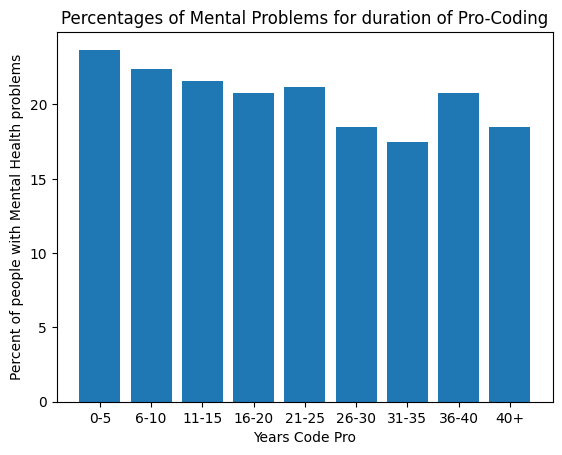

In [14]:
cat = ['0-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40','40+']

d1 = data[data['YearsCodePro'] <= 5]
d2 = data[data['YearsCodePro'] <= 10]
d2 = d2[d2['YearsCodePro'] > 5]
d3 = data[data['YearsCodePro'] <= 15]
d3 = d3[d3['YearsCodePro'] > 10]
d4 = data[data['YearsCodePro'] <= 20]
d4 = d4[d4['YearsCodePro'] > 15]
d5 = data[data['YearsCodePro'] <= 25]
d5 = d5[d5['YearsCodePro'] > 20]
d6 = data[data['YearsCodePro'] <= 30]
d6 = d6[d6['YearsCodePro'] > 25]
d7 = data[data['YearsCodePro'] <= 35]
d7 = d7[d7['YearsCodePro'] > 30]
d8 = data[data['YearsCodePro'] <= 40]
d8 = d8[d8['YearsCodePro'] > 35]
d9 = data[data['YearsCodePro'] > 40]


d1I=len(d1[d1['MentalHealth'] == 1])/len(d1)*100
d2I=len(d2[d2['MentalHealth'] == 1])/len(d2)*100
d3I=len(d3[d3['MentalHealth'] == 1])/len(d3)*100
d4I=len(d4[d4['MentalHealth'] == 1])/len(d4)*100
d5I=len(d5[d5['MentalHealth'] == 1])/len(d5)*100
d6I=len(d6[d6['MentalHealth'] == 1])/len(d6)*100
d7I=len(d7[d7['MentalHealth'] == 1])/len(d7)*100
d8I=len(d8[d8['MentalHealth'] == 1])/len(d8)*100
d9I=len(d9[d9['MentalHealth'] == 1])/len(d9)*100

vals = [d1I,d2I,d3I,d4I,d5I,d6I,d7I,d8I,d9I]

plt.bar(cat,vals)

plt.xlabel('Years Code Pro')
plt.ylabel('Percent of people with Mental Health problems')
plt.title('Percentages of Mental Problems for duration of Pro-Coding')

<ipython-input-15-ca3ddaeef63f>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

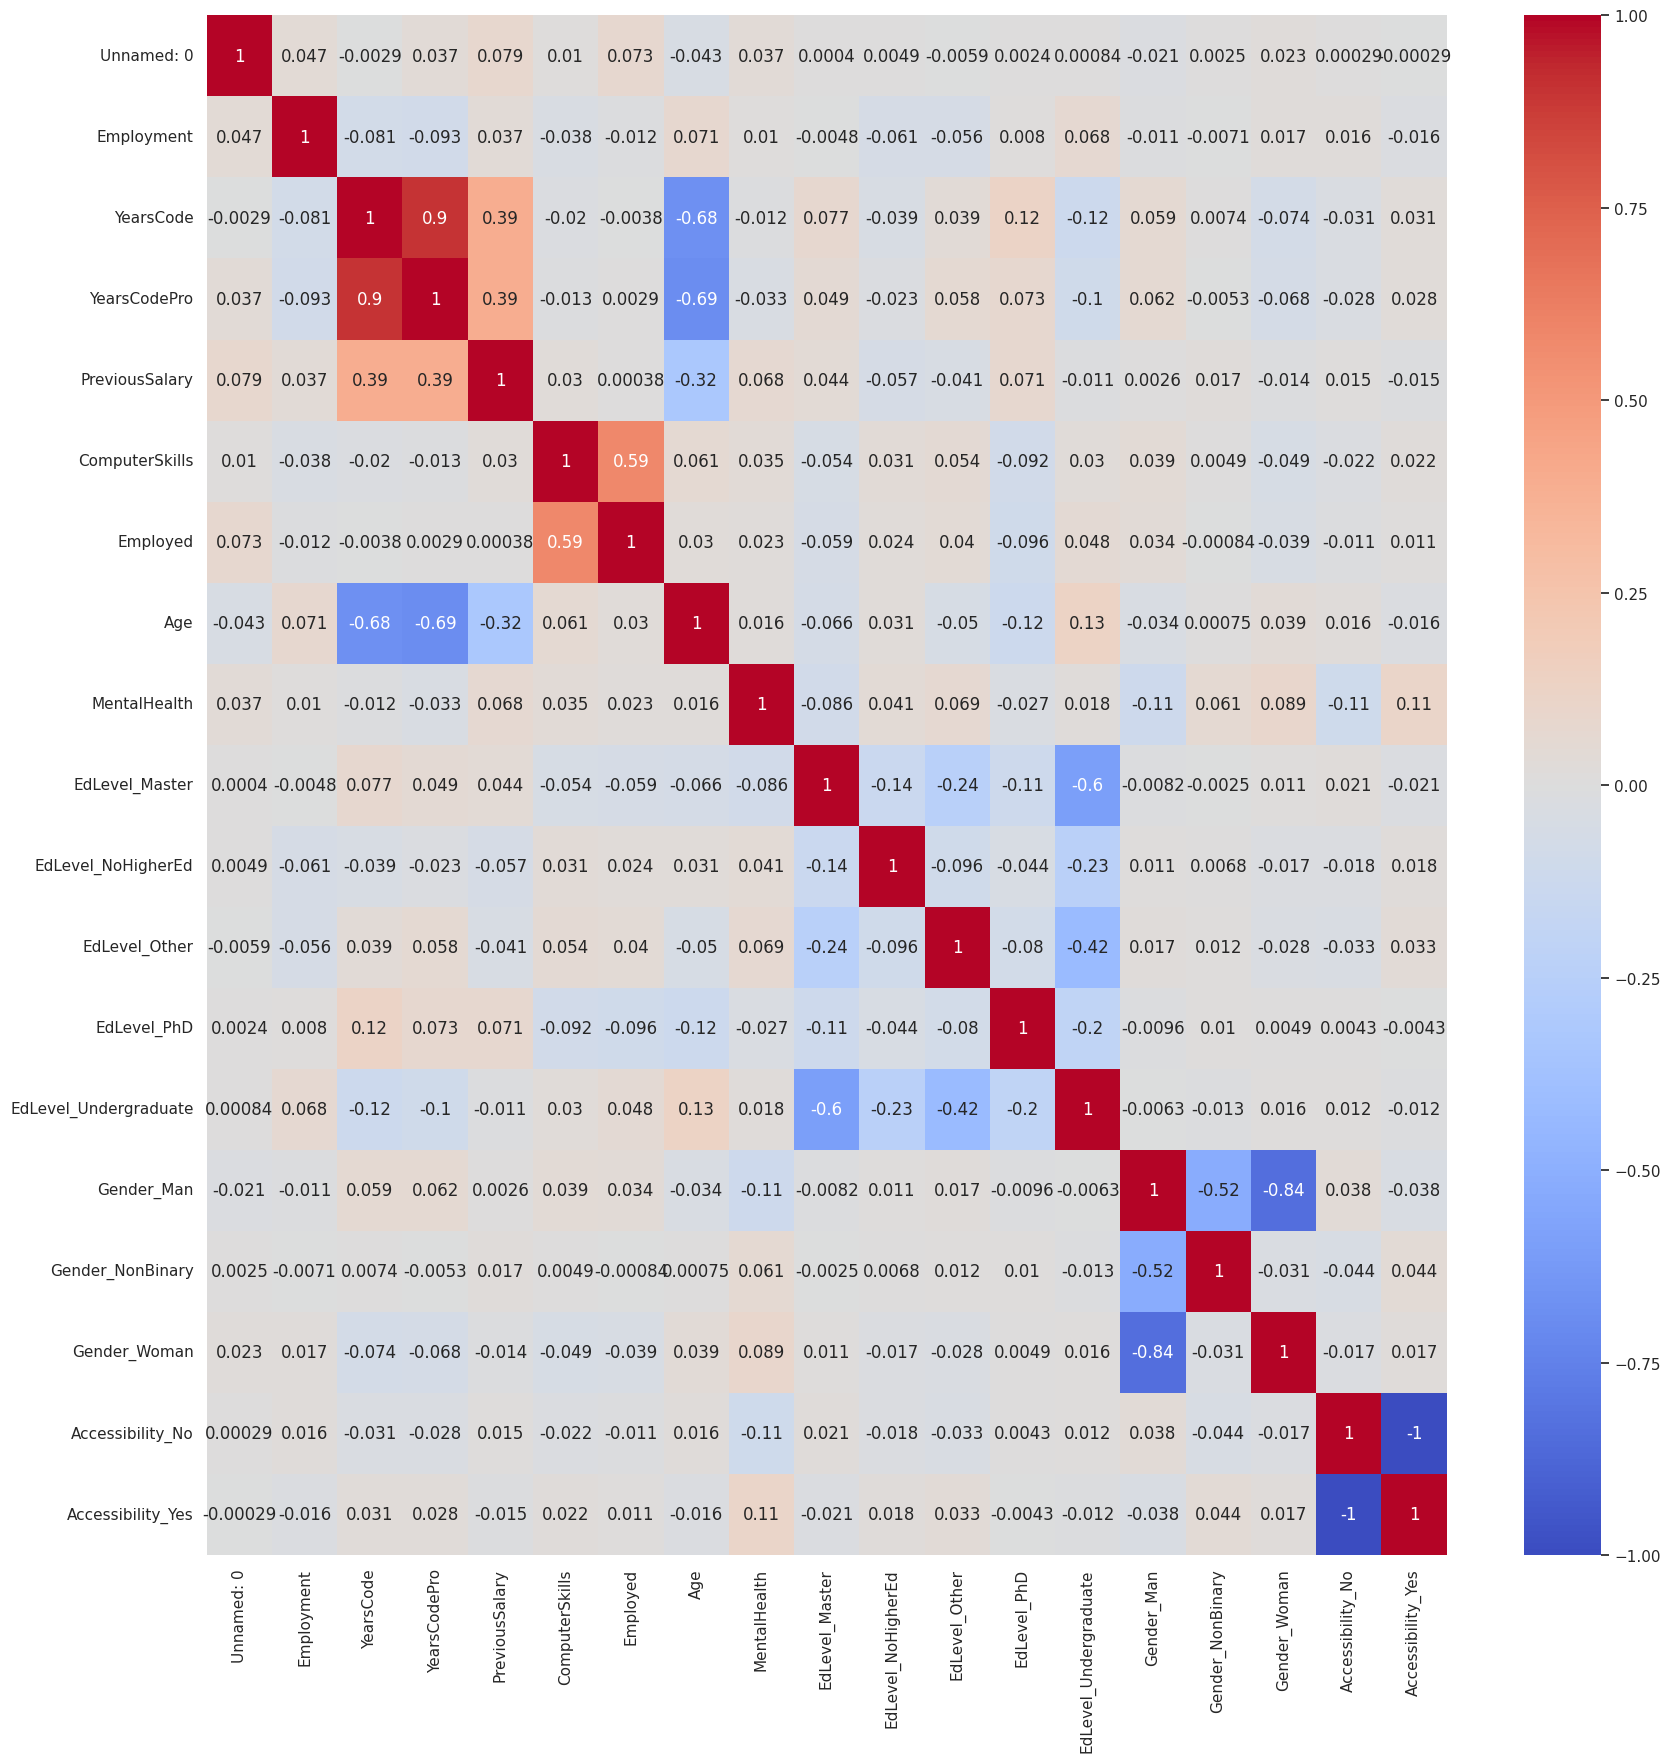

In [15]:
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
# Apply the default theme
sns.set_theme()
plt.figure(figsize=(20, 20))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

Data split (testing, training)

In [16]:
data = data.dropna()

In [17]:
data = data.drop_duplicates()

Data operation on train set

Equal people's with mental health problems to healthy 1:1

In [20]:
dataXmeq = dataX[dataX['MentalHealth'] == 1]
dataXneq = dataX[dataX['MentalHealth'] == 0]

dataXeq = dataXneq[:len(dataXmeq)]

In [21]:
dataXeq = dataXeq.append(dataXmeq)

<ipython-input-21-2238cb1364c0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataXeq = dataXeq.append(dataXmeq)


Normalizing data

In [22]:
#X_train = dataX.drop(['MentalHealth'], axis = 1)
#y_train = dataX['MentalHealth']

X_train = dataXeq.drop(['MentalHealth'], axis = 1)
y_train = dataXeq['MentalHealth']

X_test = Data_test.drop(['MentalHealth'], axis = 1)
y_test = Data_test['MentalHealth']

X_val = Data_val.drop(['MentalHealth'], axis = 1)
y_val = Data_val['MentalHealth']

**Less features**

In [ ]:
X_train = dataX.drop(['MentalHealth', 'YearsCodePro',
                       'YearsCode', 'PreviousSalary',
                       'Age'], axis = 1) #'YearsCodePro',
y_train = dataX['MentalHealth']

X_test = Data_test.drop(['MentalHealth', 'YearsCodePro',
                          'YearsCode', 'PreviousSalary',
                          'Age'], axis = 1)
y_test = Data_test['MentalHealth']

X_val = Data_val.drop(['MentalHealth', 'YearsCodePro',
                        'YearsCode', 'PreviousSalary',
                        'Age'], axis = 1)
y_val = Data_val['MentalHealth']

minmax_scaler = MinMaxScaler().set_output(transform="pandas")
dataTrain_normalized = minmax_scaler.fit_transform(XX_train)

In [27]:
minmax_scaler = MinMaxScaler().set_output(transform="pandas")
dataTrain_normalized_2 = minmax_scaler.fit_transform(X_train)
dataTrain_normalized = minmax_scaler.fit_transform(X_train) # dodana zmienna skopiowana żeby nie musieć podmieniać jeśli testujemy z "Less features"
dataTrain_normalized_old = minmax_scaler.fit_transform(Data_train)

<Axes: >

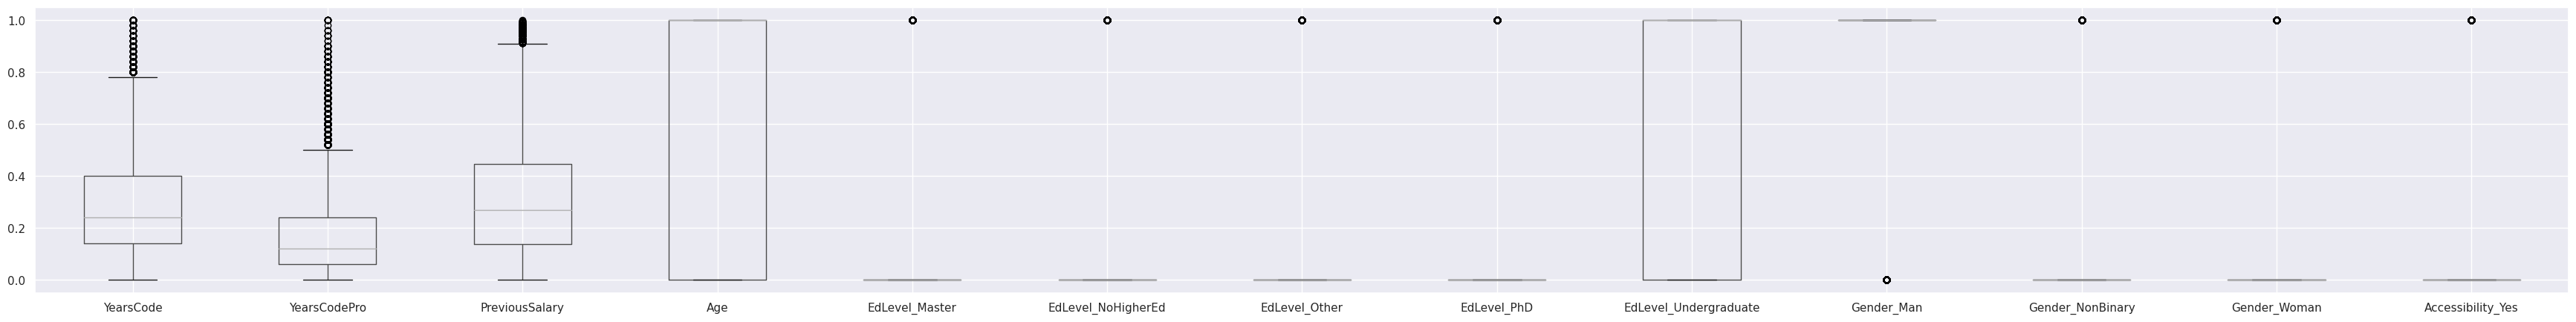

In [24]:
plt.figure(figsize=(44, 5))
dataTrain_normalized_2.boxplot()

<Axes: xlabel='YearsCode', ylabel='YearsCodePro'>

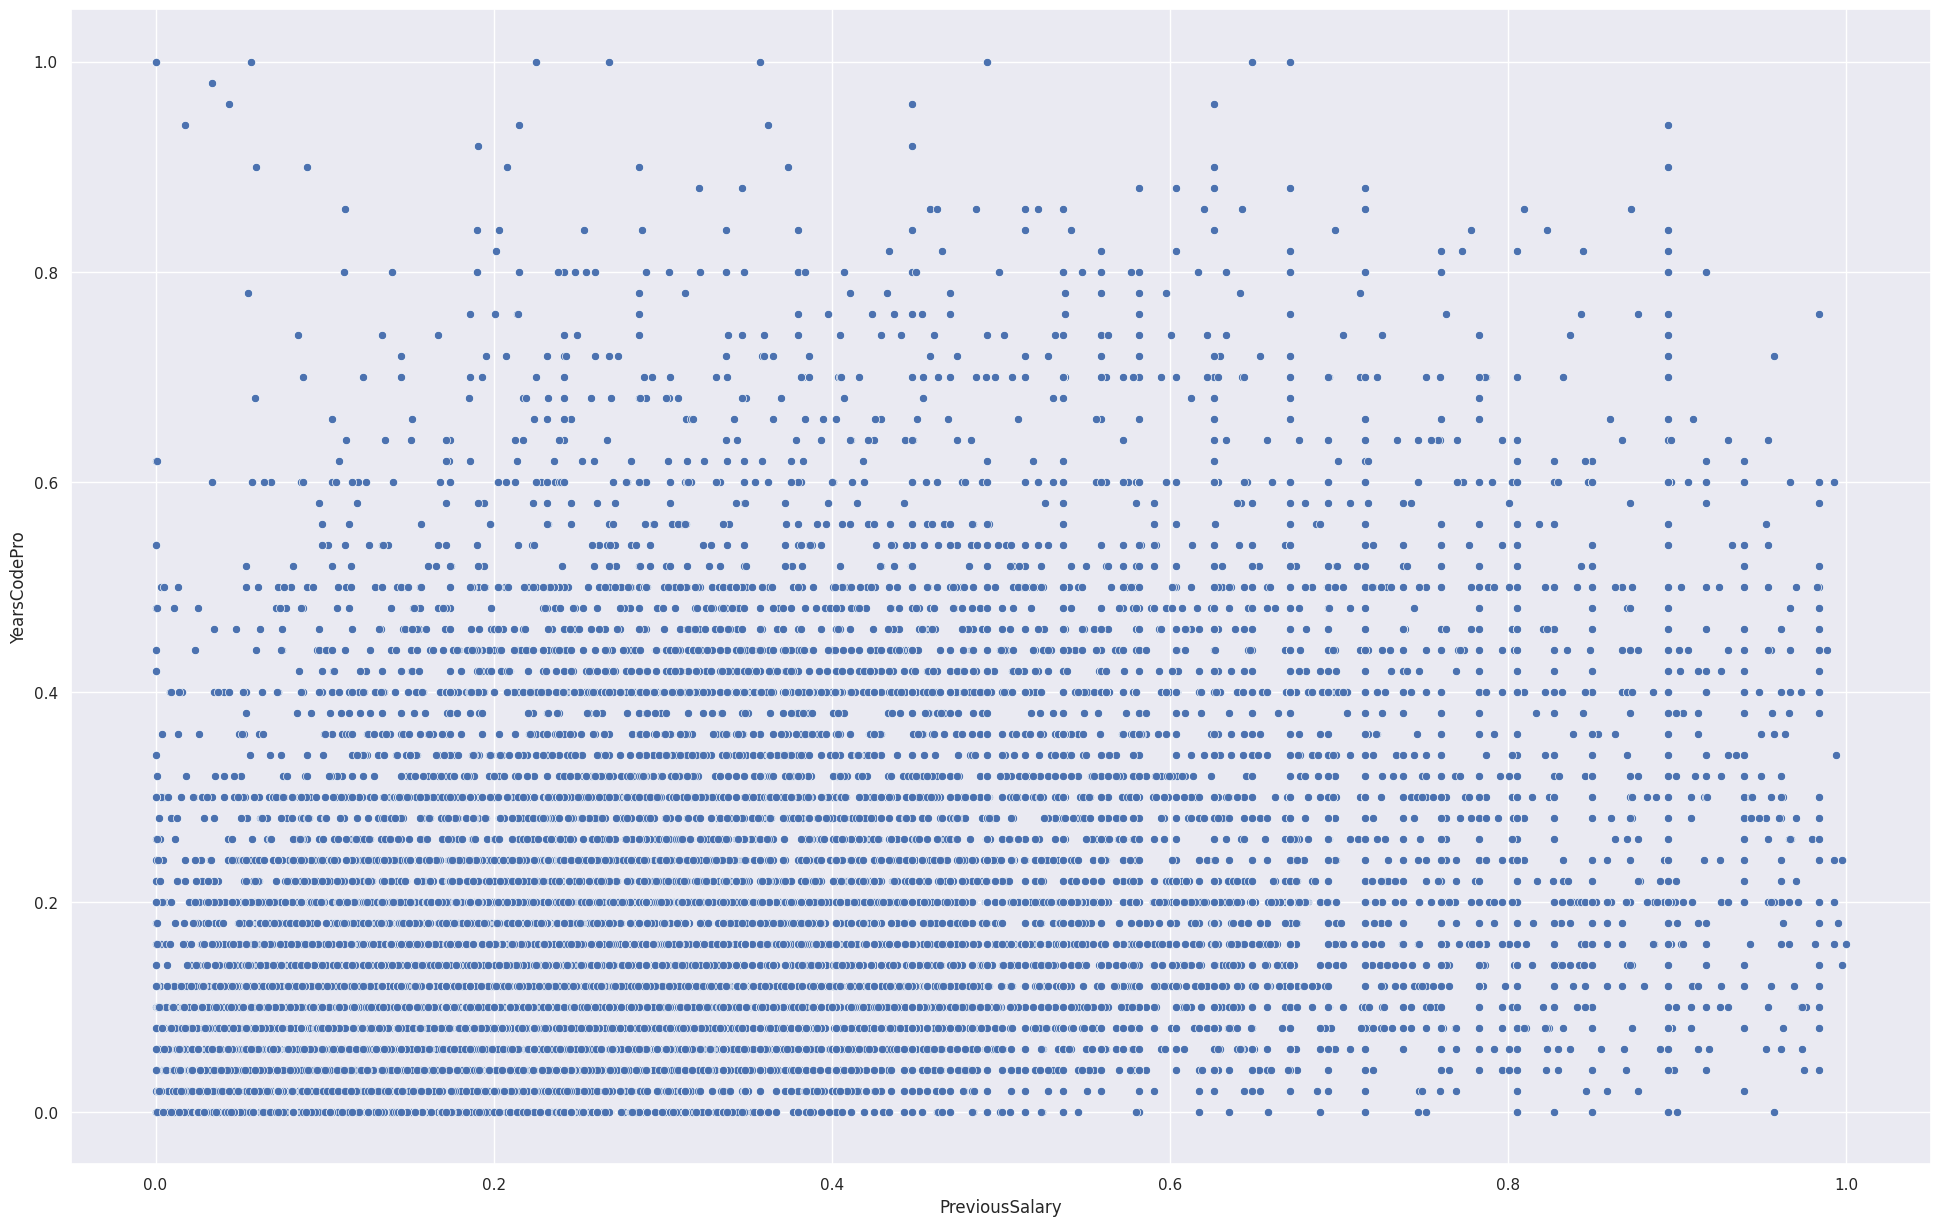

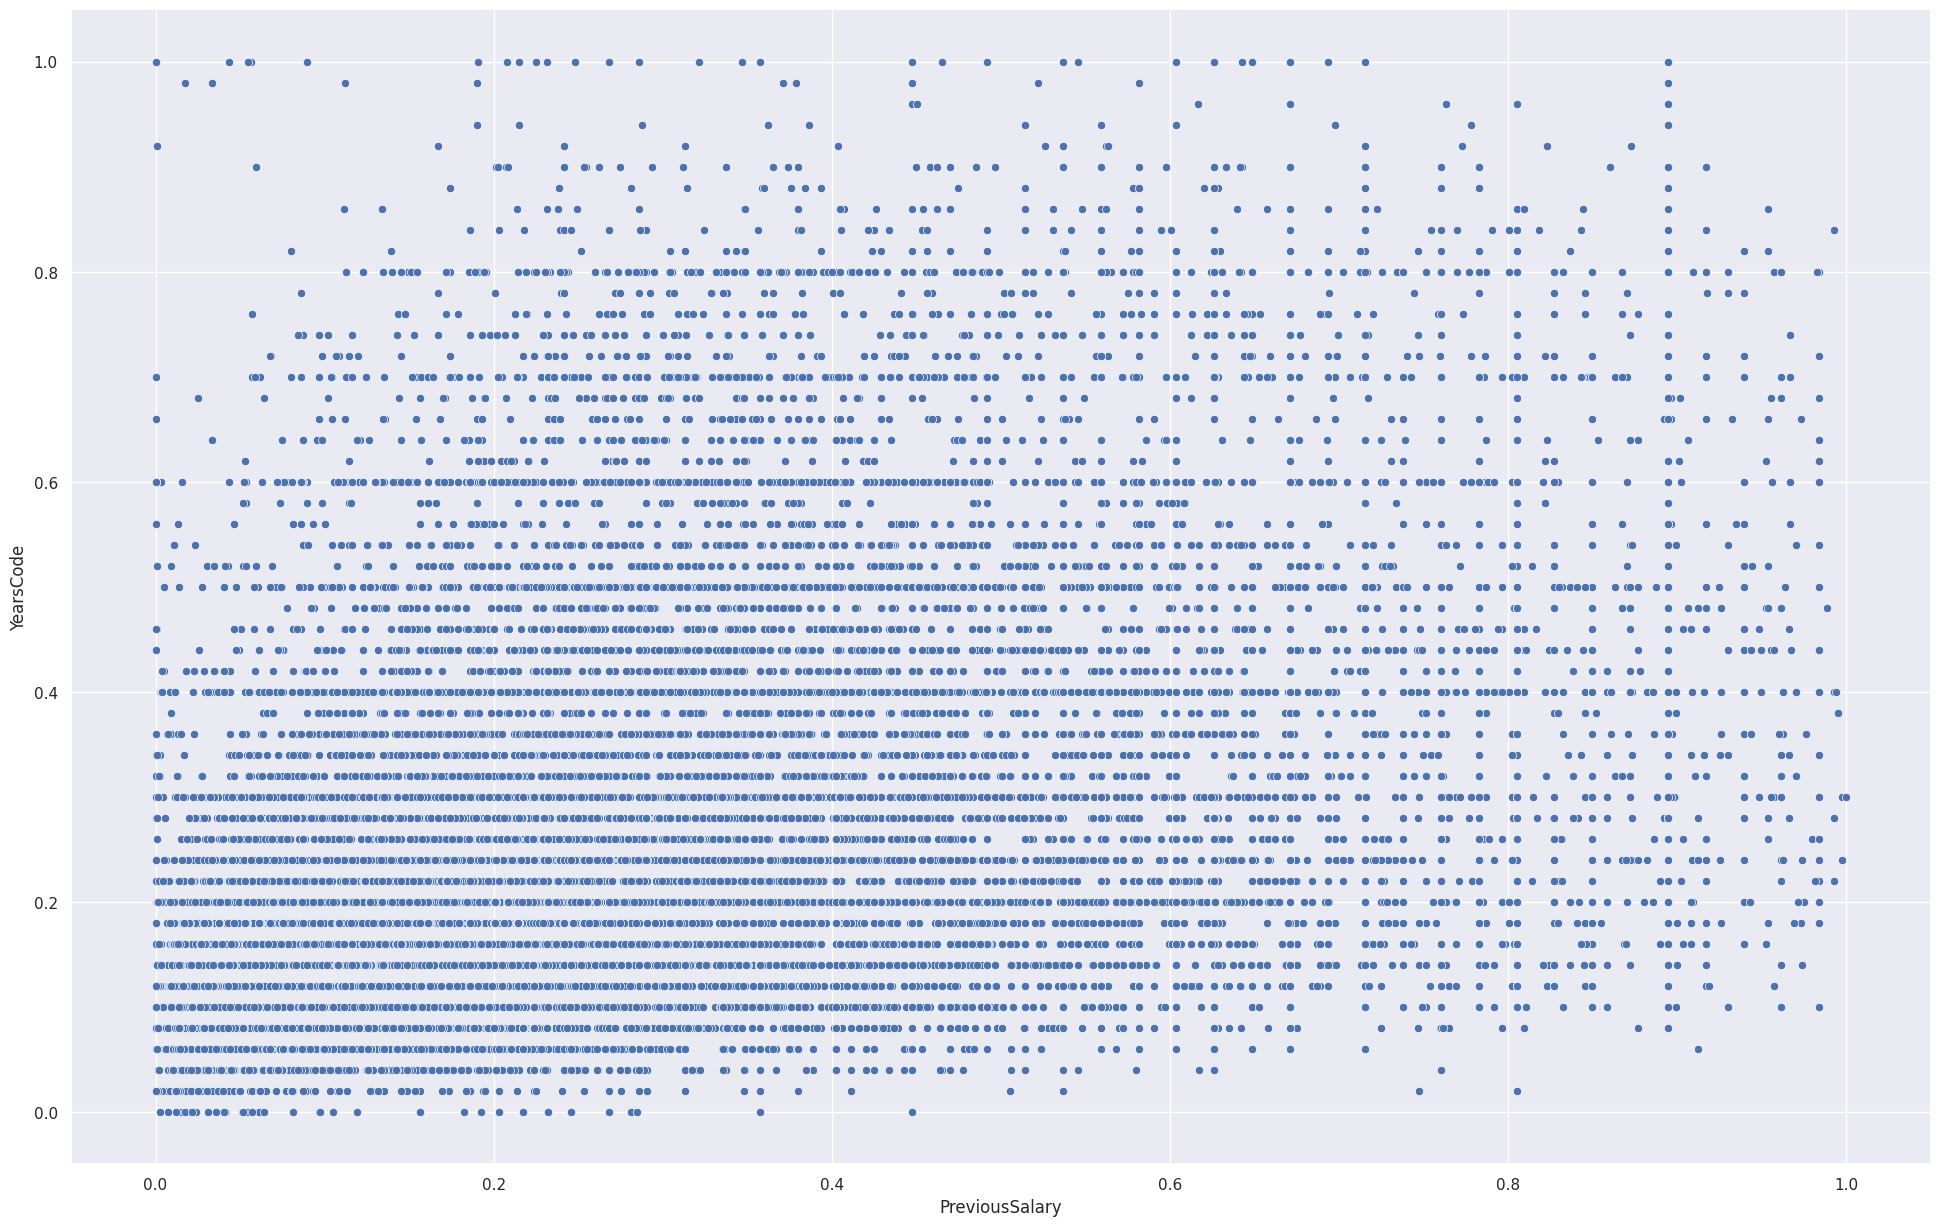

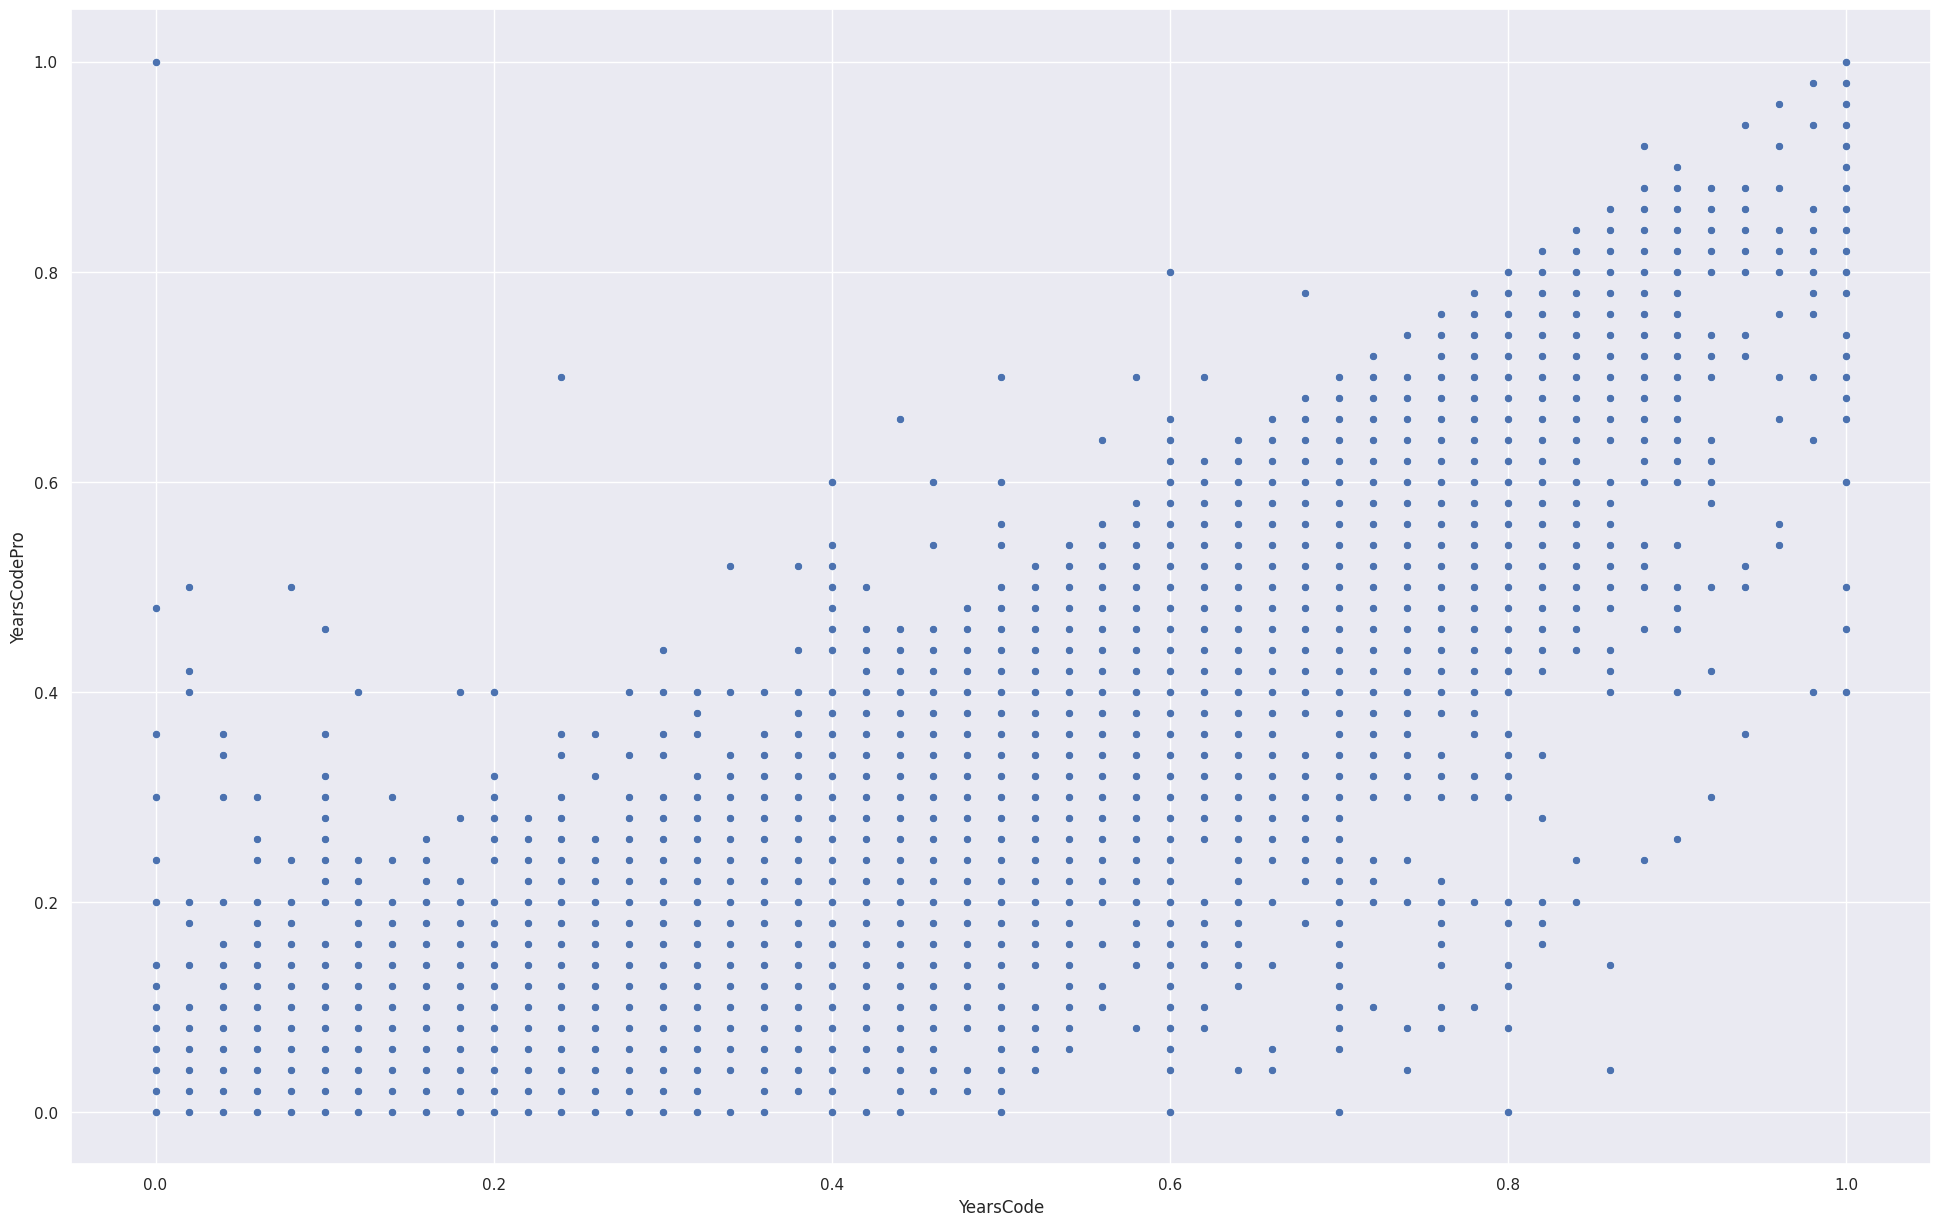

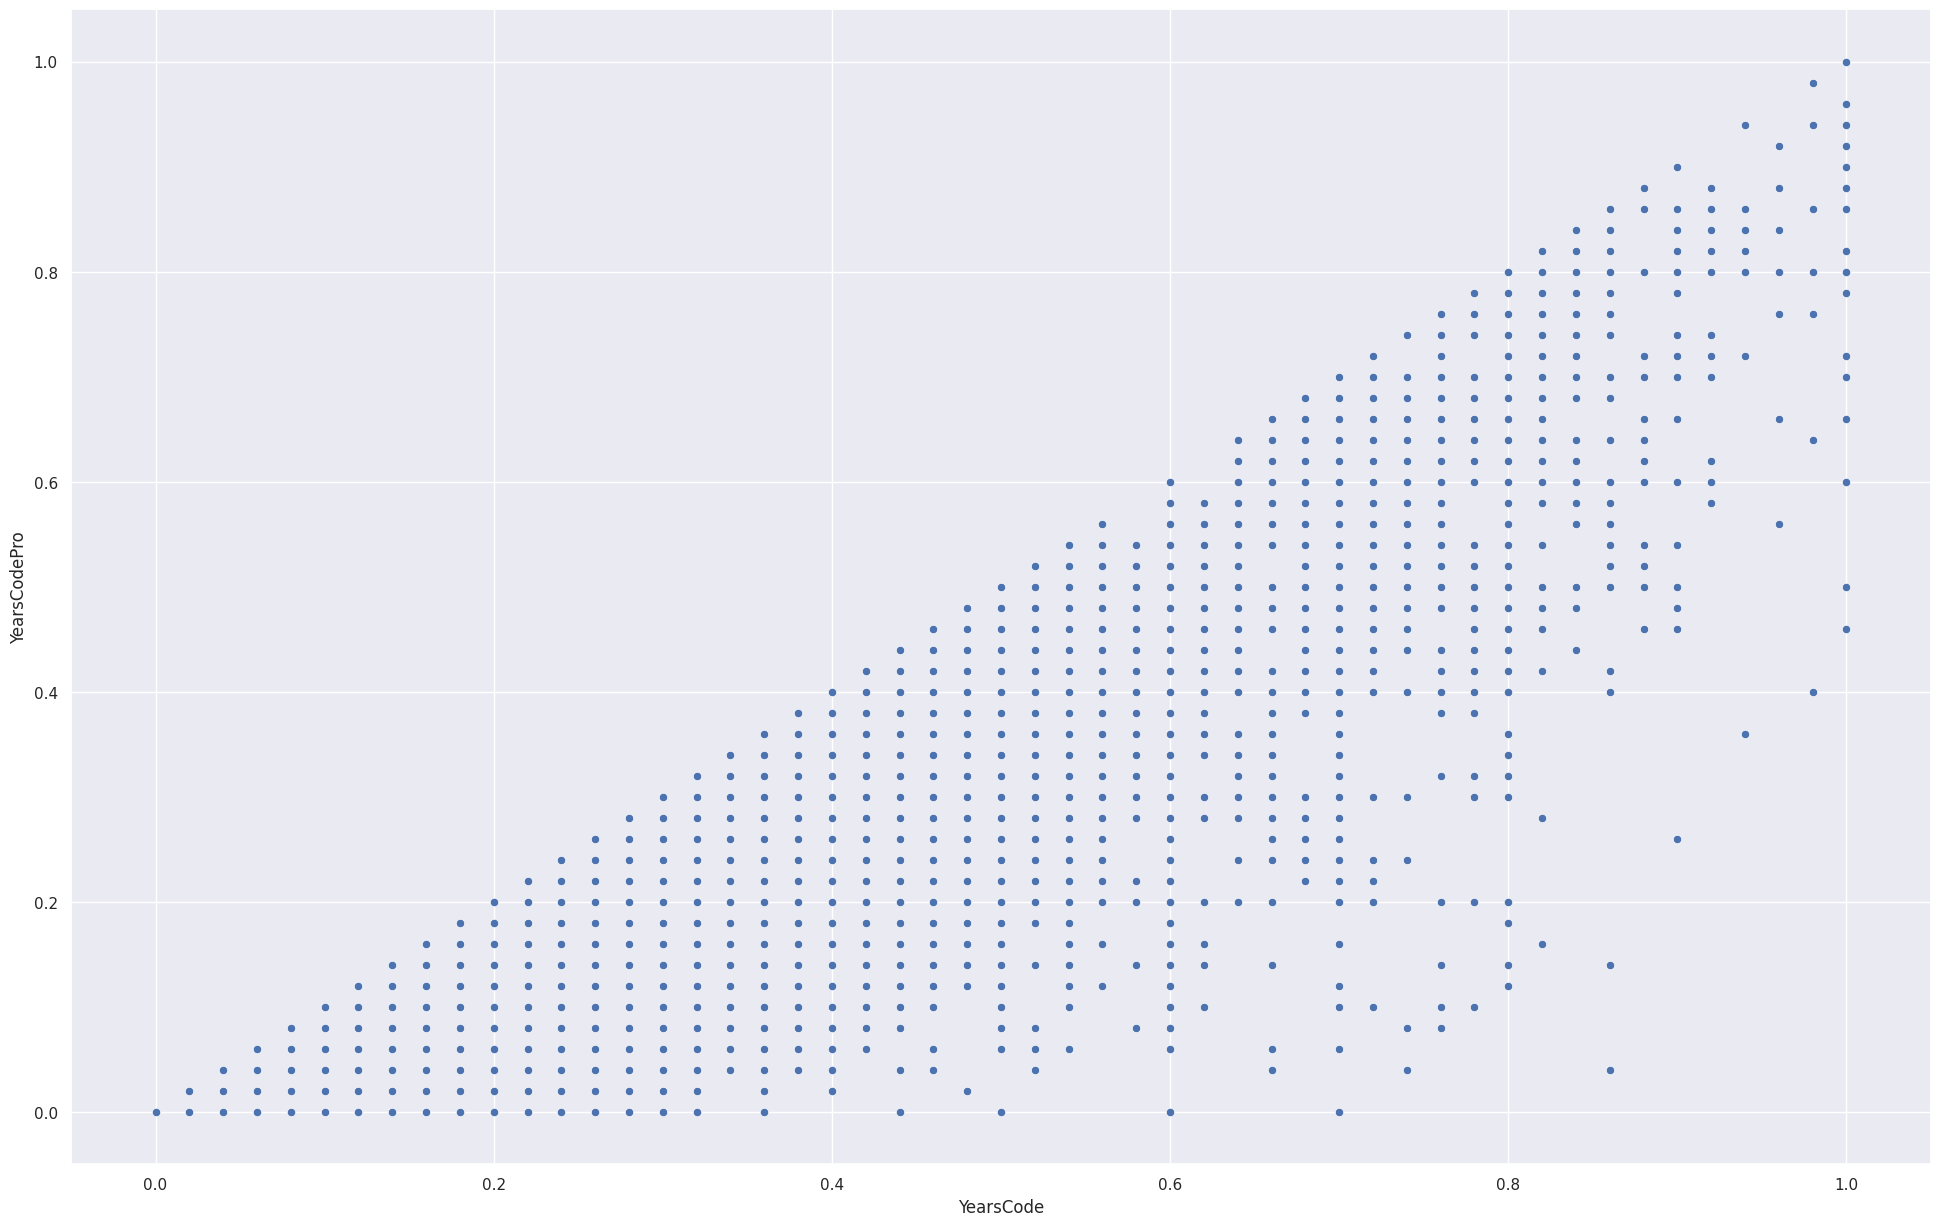

In [28]:
sns.set_theme()

plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized, x='PreviousSalary', y='YearsCodePro')
plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized, x='PreviousSalary', y='YearsCode')

plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized_old, x='YearsCode', y='YearsCodePro')
plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized, x='YearsCode', y='YearsCodePro')

in report describe why have you cut data above line above

# **Classification Task**

Imports

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

Define classifiers

In [ ]:
#clf = svm.SVC(kernel='rbf')
#clf = MLPClassifier()
#clf = KNeighborsClassifier(n_neighbors=5)
#clf = tree.DecisionTreeClassifier(max_depth=3)

**SVM clasiffiers**

SVM classifier kernel linear

In [ ]:
clf = svm.SVC(kernel='linear', random_state=1)
clf.fit(dataTrain_normalized, y_train)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_svc_rbf = accuracy_score(y_train, y_pred_train)
acc_val_svc_rbf = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_svc_rbf}, val: {acc_val_svc_rbf}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

SVM classifier kernel poly

In [ ]:
clf = svm.SVC(kernel='poly', random_state=1)
clf.fit(dataTrain_normalized_2, y_train)
y_pred_train = clf.predict(dataTrain_normalized_2)
y_pred = clf.predict(X_val)

acc_train_svc_rbf = accuracy_score(y_train, y_pred_train)
acc_val_svc_rbf = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_svc_rbf}, val: {acc_val_svc_rbf}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
FNR = fn/(fn+tp);
TPR = tp/(tp+fn);

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp},\n FNR: {FNR}, TPR: {TPR}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

SVM classifier kernel rbf

In [ ]:
clf = svm.SVC(kernel='rbf', degree=2,C=2, random_state=1)
clf.fit(dataTrain_normalized_2, y_train)
y_pred_train = clf.predict(dataTrain_normalized_2)
y_pred = clf.predict(X_val)

acc_train_svc_rbf = accuracy_score(y_train, y_pred_train)
acc_val_svc_rbf = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_svc_rbf}, val: {acc_val_svc_rbf}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

FNR = fn/(fn+tp);
TPR = tp/(tp+fn);

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp},\n FNR: {FNR}, TPR: {TPR}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
FNR = fn/(fn+tp);
TPR = tp/(tp+fn);
print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp},\n FNR: {FNR}, TPR: {TPR}")

acc score, train: 0.5993807735255304, val: 0.22622615803814713
tn train: 6061, fp train: 3790, fn train: 4103, tp train: 5748,
 FNR: 0.4165059384834027, TPR: 0.5834940615165973
tn val: 0, fp val: 11359, fn val: 0, tp val: 3321,
 FNR: 0.0, TPR: 1.0


**MLP Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(20,30,15), solver='adam', max_iter=10000, random_state=1, early_stopping=True)
clf.fit(dataTrain_normalized_2, y_train)
y_pred_train = clf.predict(dataTrain_normalized_2)
y_pred = clf.predict(X_val)

acc_train_mlp = accuracy_score(y_train, y_pred_train)
acc_val_mlp = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_mlp}, val: {acc_val_mlp}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
FNR = fn/(fn+tp);
TPR = tp/(tp+fn);

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp},\n FNR: {FNR}, TPR: {TPR}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
FNR = fn/(fn+tp);
TPR = tp/(tp+fn);
print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp},\n FNR: {FNR}, TPR: {TPR}")

acc score, train: 0.6322200791797787, val: 0.22704359673024524
tn train: 6564, fp train: 3287, fn train: 3959, tp train: 5892,
 FNR: 0.40188813318444827, TPR: 0.5981118668155517
tn val: 13, fp val: 11346, fn val: 1, tp val: 3320,
 FNR: 0.00030111412225233364, TPR: 0.9996988858777477


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
# in case of classification
scores = cross_val_score(clf, dataTrain_normalized, y_train, cv=5, scoring='accuracy')
scores = cross_validate(clf, dataTrain_normalized, y_train, cv=5,
                        scoring=['accuracy','f1', 'rand_score','recall'])

In [ ]:
print(scores['test_accuracy'])
print(scores['test_f1'])
print(scores['test_recall'])
print(scores['test_rand_score'])
#print(scores['fit_time'])
#print(scores['score_time'])

GRID SEARCH MLP

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = MLPClassifier()
parameters = {'hidden_layer_sizes':[(5,10),(15,30),(10,10,10),(15,10),(20,30,15)],
              'solver':('lbfgs', 'adam', 'sgd'),
              'early_stopping':[True,False]}
grid_search = GridSearchCV(clf, parameters, cv=5, scoring='recall')
grid_search.fit(dataTrain_normalized_2, y_train)
print(grid_search.best_params_) # to get the best parameters
print(grid_search.best_estimator_) # to get the best estimator
print(grid_search.cv_results_) # to get all results

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

{'early_stopping': True, 'hidden_layer_sizes': (20, 30, 15), 'solver': 'adam'}
MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 30, 15))
{'mean_fit_time': array([ 3.72591362,  2.43502092,  3.06038094,  7.32081313,  3.2631391 ,
        3.4355391 ,  5.31102715,  3.06329427,  2.30757656,  4.2541018 ,
        2.7396987 ,  4.50992098, 10.07415729,  2.81090941,  3.81749563,
        3.36243157,  2.74176416,  4.72833943,  7.29830008,  4.72319121,
        5.57370157,  5.12140865,  3.67977252,  5.69961963,  4.62462382,
        4.08460212,  5.32748227,  9.42827125,  8.62708225,  5.74808254]), 'std_fit_time': array([0.93386892, 0.69606038, 1.21468598, 1.42928582, 1.58716769,
       1.75437899, 1.21639666, 2.18460103, 0.69857867, 1.13837629,
       1.55631478, 2.01498889, 1.31997784, 0.90766165, 1.46618995,
       0.89158015, 0.31490226, 2.18761146, 1.63565378, 1.56000598,
       0.91654504, 0.90522779, 0.48175122, 2.64894965, 1.03381778,
       0.64826278, 1.43323192, 1.34379858, 2.55396

Random search logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0)
#MLP = MLPClassifier('hidden_layer_sizes'=(5, 10), 'solver'='adam' ,'early_stopping'=False)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])

clf = RandomizedSearchCV(logistic, distributions, random_state=0)

search = clf.fit(dataTrain_normalized_2, y_train, scoring='')

print(search.best_params_) # to get the best parameters
print(search.best_estimator_) # to get the best estimator
print(search.cv_results_) # to get all results

ValueError: ignored

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(10, 30, 20), solver='lbfgs', max_iter=5000, random_state=1, early_stopping=True)
x_frames = [dataTrain_normalized_2, XX_val]
x_11 = pd.concat(x_frames)
y_frames = [yy_train, yy_val]
y_11 = pd.concat(y_frames)
clf.fit(x_11, y_11)

y_pred_train = clf.predict(dataTrain_normalized_2)
y_pred = clf.predict(XX_val)

acc_train_mlp = accuracy_score(y_train, y_pred_train)
acc_val_mlp = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_mlp}, val: {acc_val_mlp}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

**Final classifier of test subset**

In [30]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(20,30,15), solver='lbfgs', max_iter=10000, random_state=1, early_stopping=True)
clf.fit(dataTrain_normalized_2, y_train)
y_pred_train = clf.predict(dataTrain_normalized_2)
y_pred = clf.predict(X_val)
y_pred_test = clf.predict(X_test)

acc_train_mlp = accuracy_score(y_train, y_pred_train)
acc_val_mlp = accuracy_score(y_val, y_pred)
acc_test_mlp = accuracy_score(y_test, y_pred_test)

print(f"acc score, train: {acc_train_mlp}, val: {acc_val_mlp}, test: {acc_test_mlp}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
FNR = fn/(fn+tp);
TPR = tp/(tp+fn);

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp},\n FNR: {FNR}, TPR: {TPR}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
FNR = fn/(fn+tp);
TPR = tp/(tp+fn);
print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp},\n FNR: {FNR}, TPR: {TPR}")

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
FNR = fn/(fn+tp);
TPR = tp/(tp+fn);
print(f"tn test: {tn}, fp test: {fp}, fn test: {fn}, tp test: {tp},\n FNR: {FNR}, TPR: {TPR}")

acc score, train: 0.6322200791797787, val: 0.22704359673024524, test: 0.22138964577656675
tn train: 6564, fp train: 3287, fn train: 3959, tp train: 5892,
 FNR: 0.40188813318444827, TPR: 0.5981118668155517
tn val: 13, fp val: 11346, fn val: 1, tp val: 3320,
 FNR: 0.00030111412225233364, TPR: 0.9996988858777477
tn test: 8, fp test: 11425, fn test: 5, tp test: 3242,
 FNR: 0.001539882968894364, TPR: 0.9984601170311056


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
